# Model Prototyping
-----

## Setup
____

In [68]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

X_train = pd.read_csv('train_features.csv')
X_test = pd.read_csv('test_features.csv')
y_train = pd.read_csv('train_labels.csv')['charged_off']
sample_submission = pd.read_csv('sample_submission.csv')

X_train.shape, X_test.shape, y_train.shape

((37745, 103), (9437, 103), (37745,))

## Data Frames
____

### X Train is used to tune and develop a model and get a basic understanding of how the model will perform when generating predictions

In [69]:
X_train.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method
0,43373,NaN,12000,12000,36 months,16.02%,422.01,C,C5,Driver,4 years,MORTGAGE,81000.0,NaN,NaN,debt_consolidation,Debt consolidation,280xx,NC,12.76,0,Dec-2005,1,48.0,NaN,7,0,4912,23.5%,15,w,0,48.0,Individual,NaN,NaN,0,0,174783,1,2,0,4,13.0,33668,82.0,2,5,2962,63.0,20900,1,1,2,9,24969.0,588.0,89.3,0,0,145.0,23,1,1,1,8.0,NaN,1.0,NaN,2,2,2,2,2,9,4,5,2,7,0.0,0,0,2,92.9,100.0,0,0,206618,38580,5500,40863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
1,24414,NaN,6300,6300,36 months,14.07%,215.54,C,C3,GMP Lead,4 years,RENT,39000.0,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,21.42,0,Mar-2012,1,NaN,NaN,10,0,11876,59.4%,12,w,0,NaN,Individual,NaN,NaN,0,0,31046,0,1,0,2,14.0,19170,83.0,3,8,5153,72.0,20000,1,0,1,10,3105.0,6877.0,59.3,0,0,17.0,72,8,8,0,8.0,NaN,6.0,NaN,0,6,7,7,8,2,9,10,7,10,0.0,0,0,3,100.0,42.9,0,0,43140,31046,16900,23140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
2,46723,NaN,4500,4500,36 months,7.21%,139.38,A,A3,Accounts,3 years,RENT,78000.0,NaN,NaN,debt_consolidation,Debt consolidation,906xx,CA,2.17,0,May-2000,2,NaN,NaN,13,0,1715,5.2%,19,w,0,NaN,Individual,NaN,NaN,0,0,35329,0,8,1,2,10.0,33614,106.0,1,1,1196,54.0,33300,4,0,3,3,2718.0,21585.0,7.4,0,0,166.0,218,10,10,0,31.0,NaN,1.0,NaN,0,3,3,3,4,13,5,6,3,13,0.0,0,0,2,100.0,0.0,0,0,65092,35329,23300,31792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
3,24878,NaN,12000,12000,36 months,9.44%,384.06,B,B1,Client Processing Associate,10+ years,MORTGAGE,62000.0,NaN,NaN,debt_consolidation,Debt consolidation,441xx,OH,13.76,0,Feb-2003,0,NaN,NaN,22,0,9404,16.3%,33,w,0,NaN,Individual,NaN,NaN,0,0,75160,4,1,0,2,13.0,17123,67.0,6,9,6898,32.0,57600,3,1,2,12,3579.0,33602.0,17.0,0,0,162.0,179,1,1,1,1.0,NaN,5.0,NaN,0,1,3,9,13,7,20,25,3,22,0.0,0,0,7,100.0,0.0,0,0,133065,26527,40500,25465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
4,39038,NaN,12000,12000,36 months,22.35%,460.47,D,D5,Construction Operator,10+ years,MORTGAGE,70000.0,NaN,NaN,debt_consolidation,Debt consolidation,751xx,TX,14.04,4,Nov-2001,2,13.0,NaN,18,0,17895,24.2%,45,w,0,13.0,Individual,NaN,NaN,0,7218,113702,9,2,2,4,6.0,16711,68.0,9,10,5373,35.0,73900,3,6,3,14,6317.0,32863.0,24.1,0,0,159.0,201,0,0,1,0.0,62.0,3.0,62.0,6,9,11,11,14,22,15,20,11,18,0.0,0,2,11,82.2,9.1,0,0,192842,34606,43300,24499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash


### Y Train is used with X train to gauge the model performance

In [70]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: charged_off, dtype: int64

### X test will be used to generate predictions

In [71]:
X_test.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,disbursement_method
0,57146,NaN,18500,18500,60 months,25.82%,551.93,E,E4,Account Service Representative,10+ years,MORTGAGE,87000.0,NaN,NaN,debt_consolidation,Debt consolidation,452xx,OH,22.07,0,Jun-2007,3,NaN,111.0,20,1,5504,16.9%,37,w,0,NaN,Individual,NaN,NaN,0,200,212122,2,5,4,6,1.0,105151,88.0,2,3,2991,66.0,32500,6,3,12,10,10606.0,16813.0,23.9,0,0,127.0,55,7,1,2,8.0,NaN,1.0,NaN,0,4,5,8,9,20,14,15,5,20,0.0,0,0,6,100.0,0.0,1,0,250214,110655,22100,113624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
1,20988,NaN,36000,36000,60 months,12.61%,811.95,C,C1,Vice President of IT,7 years,MORTGAGE,165000.0,NaN,NaN,other,Other,480xx,MI,13.39,0,Oct-1992,0,31.0,NaN,12,0,21833,42.6%,21,w,0,NaN,Individual,NaN,NaN,0,0,42059,2,2,1,2,6.0,20226,56.0,1,3,5880,48.0,51200,1,0,1,5,3505.0,19340.0,41.4,0,0,304.0,131,4,4,0,15.0,31.0,6.0,31.0,0,3,7,6,6,6,10,14,7,12,0.0,0,0,2,85.7,16.7,0,0,87584,42059,33000,36384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
2,10031,NaN,12000,12000,36 months,22.90%,463.90,E,E1,Director of Technology,4 years,MORTGAGE,110000.0,NaN,NaN,debt_consolidation,Debt consolidation,972xx,OR,15.82,1,Dec-2004,0,7.0,NaN,4,0,19930,97.2%,11,f,0,NaN,Individual,NaN,NaN,0,0,170912,0,1,1,1,8.0,25739,86.0,0,0,10385,90.0,20500,0,0,0,1,42728.0,570.0,97.2,0,0,130.0,162,42,8,2,42.0,NaN,19.0,NaN,0,2,2,2,3,4,2,5,2,4,0.0,0,0,1,81.8,100.0,0,0,210150,45669,20500,30000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
3,33892,NaN,24875,24875,60 months,11.98%,553.08,B,B5,vp,10+ years,MORTGAGE,105000.0,NaN,NaN,other,Other,463xx,IN,6.91,0,Nov-1995,1,NaN,NaN,7,0,29537,47.3%,24,w,0,NaN,Individual,NaN,NaN,0,0,507349,0,0,0,1,18.0,0,NaN,0,1,12097,47.0,62400,1,1,2,3,84558.0,27863.0,51.5,0,0,126.0,268,22,15,3,65.0,NaN,4.0,NaN,0,4,4,5,7,9,6,12,4,7,0.0,0,0,0,100.0,25.0,0,0,547400,29537,57400,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash
4,35374,NaN,4000,4000,36 months,10.91%,130.79,B,B4,Sales consultant,< 1 year,MORTGAGE,20000.0,NaN,NaN,other,Other,705xx,LA,69.96,0,Sep-2003,0,NaN,NaN,16,0,5863,18.8%,28,w,0,NaN,Joint App,66000.0,32.72,0,0,169662,1,2,1,2,10.0,43585,85.0,0,4,1013,46.0,31200,10,2,5,7,10604.0,4533.0,37.9,0,0,159.0,53,19,2,2,22.0,NaN,4.0,NaN,0,6,10,6,7,12,13,14,10,16,0.0,0,0,2,100.0,0.0,0,0,209852,49448,7300,58652,6169.0,Sep-2003,0.0,2.0,7.0,22.9,3.0,3.0,0.0,0.0,NaN,Cash


## Data Cleaning
____

### Use a function so that both X train and X test are cleaned in the exact same way

In [72]:
def wrangle(X):
    X = X.copy()
    
    # Drop some columns
    X = X.drop(columns='id')  # id is random
    X = X.drop(columns=['member_id', 'url', 'desc'])  # All null
    X = X.drop(columns='title')  # Duplicative of purpose
    X = X.drop(columns='grade')  # Duplicative of sub_grade
    
    # Transform sub_grade from "A1" - "G5" to 1.1 - 7.5
    def wrangle_sub_grade(x):
        first_digit = ord(x[0]) - 64
        second_digit = int(x[1])
        return first_digit + second_digit/10
    
    X['sub_grade'] = X['sub_grade'].apply(wrangle_sub_grade)

    # Convert percentages from strings to floats
    X['int_rate'] = X['int_rate'].str.strip('%').astype(float)
    X['revol_util'] = X['revol_util'].str.strip('%').astype(float)
        
    # Transform earliest_cr_line to an integer: how many days it's been open
    X['earliest_cr_line'] = pd.to_datetime(X['earliest_cr_line'], infer_datetime_format=True)
    X['earliest_cr_line'] = pd.Timestamp.today() - X['earliest_cr_line']
    X['earliest_cr_line'] = X['earliest_cr_line'].dt.days
    
    # Create features for three employee titles: teacher, manager, owner
    X['emp_title'] = X['emp_title'].str.lower()
    X['emp_title_teacher'] = X['emp_title'].str.contains('teacher', na=False)
    X['emp_title_manager'] = X['emp_title'].str.contains('manager', na=False)
    X['emp_title_owner']   = X['emp_title'].str.contains('owner', na=False)
    
    # Drop categoricals with high cardinality
    X = X.drop(columns=['emp_title', 'zip_code'])
    
    # Transform features with many nulls to binary flags
    many_nulls = ['sec_app_mths_since_last_major_derog',
                  'sec_app_revol_util',
                  'sec_app_earliest_cr_line',
                  'sec_app_mort_acc',
                  'dti_joint',
                  'sec_app_collections_12_mths_ex_med',
                  'sec_app_chargeoff_within_12_mths',
                  'sec_app_num_rev_accts',
                  'sec_app_open_act_il',
                  'sec_app_open_acc',
                  'revol_bal_joint',
                  'annual_inc_joint',
                  'sec_app_inq_last_6mths',
                  'mths_since_last_record',
                  'mths_since_recent_bc_dlq',
                  'mths_since_last_major_derog',
                  'mths_since_recent_revol_delinq',
                  'mths_since_last_delinq',
                  'il_util',
                  'emp_length',
                  'mths_since_recent_inq',
                  'mo_sin_old_il_acct',
                  'mths_since_rcnt_il',
                  'num_tl_120dpd_2m',
                  'bc_util',
                  'percent_bc_gt_75',
                  'bc_open_to_buy',
                  'mths_since_recent_bc']

    for col in many_nulls:
        X[col] = X[col].isnull()
    
    # For features with few nulls, do mean imputation
    for col in X:
        if X[col].isnull().sum() > 0:
            X[col] = X[col].fillna(X[col].mean())
    
    # Return the wrangled dataframe
    return X


X_train = wrangle(X_train)
X_test  = wrangle(X_test)
X_train.shape, X_test.shape

((37745, 98), (9437, 98))

### Verify null values aren't present

In [73]:
null_counts = X_train.isnull().sum()
all(null_counts == 0)

True

### Verify cardinality is low (Ordinal and Categorical encoding methods lose effectiveness on features with high cardinality)

In [74]:
cardinality = X_train.select_dtypes(exclude='number').nunique()
all(cardinality <= 50)

True

In [75]:
X_train.shape, X_test.shape

((37745, 98), (9437, 98))

## Prediction Generator
___

In [76]:
#generates predictions with a pipeline
def make_predictions(pipeline, X_train, y_train, X_test, name):
    pipeline.fit(X_train, y_train)
    sample_submission = pd.read_csv('sample_submission.csv') 
    submission = sample_submission.copy() 
    submission['charged_off'] = pipeline.predict_proba(X_test)[:, 1] 
    submission.to_csv( name + '.csv', index=False)

# Decision Tree
___

In [77]:
import category_encoders as ce
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

dtree_pipe = make_pipeline(
    ce.OrdinalEncoder(), 
    DecisionTreeClassifier(max_depth=5, class_weight='balanced')
)

cross_val_score(dtree_pipe, X_train, y_train, cv=5, scoring='roc_auc')

array([0.70297128, 0.70044493, 0.69332495, 0.68879982, 0.68917646])

### Making a prediction with the decision tree

In [10]:
make_predictions(dtree_pipe, X_train, y_train, X_test, "test_submission")

# Random Forest
____

In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = make_pipeline(
    ce.BinaryEncoder(), 
    RandomForestClassifier(
        n_estimators=220, 
        class_weight='balanced',
        min_samples_split = 0.007,
        min_samples_leaf=0.001, 
        max_depth = 9, 
        max_features = 81,
        n_jobs=-1)
)

cross_val_score(rf_pipe, X_train, y_train, cv=5, scoring='roc_auc', verbose=10)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ....................... , score=0.7340883335110961, total=  13.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s remaining:    0.0s


[CV] ....................... , score=0.7332857703291298, total=  12.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   25.9s remaining:    0.0s


[CV] ....................... , score=0.7269808061887268, total=  12.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.7s remaining:    0.0s


[CV] ....................... , score=0.7298998772197817, total=  12.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   51.1s remaining:    0.0s


[CV] ....................... , score=0.7418538295984709, total=  13.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


array([0.73408833, 0.73328577, 0.72698081, 0.72989988, 0.74185383])

### Making a prediction with the random forest

In [16]:
make_predictions(rf_pipe, X_train, y_train, X_test, "rf6")

In [17]:
from sklearn.metrics import roc_auc_score

## Tuning of Hyper-Parameters
____

### Tuning n_estimators

In [15]:
%%time
#best estimators = 220   0.728
n_estimators = list(range(200, 300, 100))

for n_estimators in n_estimators:
    
    pipe = make_pipeline(
        ce.OrdinalEncoder(), 
        RandomForestClassifier(
            n_estimators=n_estimators, 
            class_weight='balanced',
            max_depth=9, 
            oob_score=True, 
            n_jobs=-1
        )
    )
        
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:, 1]
    print('n_estimators:', n_estimators)
    print('ROC AUC, OOB:', roc_auc_score(y_train, y_pred_proba))

n_estimators: 200
ROC AUC, OOB: 0.727583594799169
n_estimators: 202
ROC AUC, OOB: 0.7267790646007641
n_estimators: 204
ROC AUC, OOB: 0.726174731490752
n_estimators: 206
ROC AUC, OOB: 0.727394041553405
n_estimators: 208
ROC AUC, OOB: 0.7266396095675203
n_estimators: 210
ROC AUC, OOB: 0.7271693295085004
n_estimators: 212
ROC AUC, OOB: 0.7273646828934164
n_estimators: 214
ROC AUC, OOB: 0.7272489429903596
n_estimators: 216
ROC AUC, OOB: 0.727018212671851
n_estimators: 218
ROC AUC, OOB: 0.7265869105211471
n_estimators: 220
ROC AUC, OOB: 0.7271794643707408
n_estimators: 222
ROC AUC, OOB: 0.7267893225132082
n_estimators: 224
ROC AUC, OOB: 0.7272742354004317
n_estimators: 226
ROC AUC, OOB: 0.7267815088252669
n_estimators: 228
ROC AUC, OOB: 0.7268837971037718
n_estimators: 230
ROC AUC, OOB: 0.7272305190189359
n_estimators: 232
ROC AUC, OOB: 0.7269108289962705
n_estimators: 234
ROC AUC, OOB: 0.7269696302141139
n_estimators: 236
ROC AUC, OOB: 0.7281133538924869
n_estimators: 238
ROC AUC, OOB: 0.7

### min_samples_splits

In [16]:
%%time
#best m_s_s: 0.007
min_samples_splits = list(range(1, 20, 1))

#divide all vals by 10
min_samples_splits = [x/1000 for x in min_samples_splits]



for min_samples_splits in min_samples_splits:
    
    pipe = make_pipeline(
        ce.OrdinalEncoder(), 
        RandomForestClassifier(
            n_estimators=220, 
            class_weight='balanced', 
            min_samples_split = min_samples_splits,
            max_depth=9, 
            oob_score=True, 
            n_jobs=-1
        )
    )
        
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:, 1]
    print('m_s_s:', min_samples_splits)
    print('ROC AUC, OOB:', roc_auc_score(y_train, y_pred_proba))

m_s_s: 0.001
ROC AUC, OOB: 0.7295426994666456
m_s_s: 0.002
ROC AUC, OOB: 0.7307235283746555
m_s_s: 0.003
ROC AUC, OOB: 0.730807129801756
m_s_s: 0.004
ROC AUC, OOB: 0.731938783373774
m_s_s: 0.005
ROC AUC, OOB: 0.7308513551636402
m_s_s: 0.006
ROC AUC, OOB: 0.7308064698052082
m_s_s: 0.007
ROC AUC, OOB: 0.731235171122059
m_s_s: 0.008
ROC AUC, OOB: 0.7310015603101434
m_s_s: 0.009
ROC AUC, OOB: 0.7307618193608018
m_s_s: 0.01
ROC AUC, OOB: 0.7300337760504412
m_s_s: 0.011
ROC AUC, OOB: 0.7305707279874903
m_s_s: 0.012
ROC AUC, OOB: 0.7298793200787159
m_s_s: 0.013
ROC AUC, OOB: 0.729938635870139
m_s_s: 0.014
ROC AUC, OOB: 0.7295548422844842
m_s_s: 0.015
ROC AUC, OOB: 0.7296051754110299
m_s_s: 0.016
ROC AUC, OOB: 0.7298173922670577
m_s_s: 0.017
ROC AUC, OOB: 0.7287827749671185
m_s_s: 0.018
ROC AUC, OOB: 0.7295426938734546
m_s_s: 0.019
ROC AUC, OOB: 0.7291438210446433
CPU times: user 6min 11s, sys: 656 ms, total: 6min 12s
Wall time: 1min 20s


In [27]:
%%time
#best m_s_s: 0.007
min_samples_leaf = list(range(1, 99, 2))

#divide all vals by 10
min_samples_leaf = [x/10000 for x in min_samples_leaf]



for min_samples_leaf in min_samples_leaf:
    
    pipe = make_pipeline(
        ce.OrdinalEncoder(), 
        RandomForestClassifier(
            n_estimators=220, 
            class_weight='balanced', 
            min_samples_split = 0.007,
            min_samples_leaf= min_samples_leaf,
            max_depth=9, 
            oob_score=True, 
            n_jobs=-1
        )
    )
        
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:, 1]
    print('m_s_l:', min_samples_leaf)
    print('ROC AUC, OOB:', roc_auc_score(y_train, y_pred_proba))

m_s_l: 0.0001
ROC AUC, OOB: 0.7302287099460261
m_s_l: 0.0003
ROC AUC, OOB: 0.7307282490279285
m_s_l: 0.0005
ROC AUC, OOB: 0.7311691323149557
m_s_l: 0.0007
ROC AUC, OOB: 0.7301865037261223
m_s_l: 0.0009
ROC AUC, OOB: 0.7314609011277405
m_s_l: 0.0011
ROC AUC, OOB: 0.7323472485252909
m_s_l: 0.0013
ROC AUC, OOB: 0.7298577135815667
m_s_l: 0.0015
ROC AUC, OOB: 0.7306411910087395
m_s_l: 0.0017
ROC AUC, OOB: 0.7311396561979544
m_s_l: 0.0019
ROC AUC, OOB: 0.7301439898807092
m_s_l: 0.0021
ROC AUC, OOB: 0.7302385315895658
m_s_l: 0.0023
ROC AUC, OOB: 0.7304964560031144
m_s_l: 0.0025
ROC AUC, OOB: 0.7295347459489272
m_s_l: 0.0027
ROC AUC, OOB: 0.7303256119815191
m_s_l: 0.0029
ROC AUC, OOB: 0.7303313226296138
m_s_l: 0.0031
ROC AUC, OOB: 0.7288472700534834
m_s_l: 0.0033
ROC AUC, OOB: 0.7303481693211523
m_s_l: 0.0035
ROC AUC, OOB: 0.7292573404508405
m_s_l: 0.0037
ROC AUC, OOB: 0.7289101543008166
m_s_l: 0.0039
ROC AUC, OOB: 0.7285040718487007
m_s_l: 0.0041
ROC AUC, OOB: 0.7289177107019682
m_s_l: 0.0043

### Max Features

In [33]:
%%time
#best MF: 38, 64, 73, 81
max_features = list(range(1,X_train.shape[1]))





for max_feature_count in max_features:
    
    pipe = make_pipeline(
        ce.OrdinalEncoder(), 
        RandomForestClassifier(
            n_estimators=220, 
            class_weight='balanced', 
            min_samples_split = 0.007,
            min_samples_leaf= 0.001,
            max_features = max_feature_count,
            max_depth=9, 
            oob_score=True, 
            n_jobs=-1
        )
    )
        
    pipe.fit(X_train, y_train)
    y_pred_proba = pipe.named_steps['randomforestclassifier'].oob_decision_function_[:, 1]
    print('max features:', max_feature_count)
    print('ROC AUC, OOB:', roc_auc_score(y_train, y_pred_proba))

max features: 1
ROC AUC, OOB: 0.7128917975819227
max features: 2
ROC AUC, OOB: 0.7228973955831487
max features: 3
ROC AUC, OOB: 0.7275781805902019
max features: 4
ROC AUC, OOB: 0.7289110380250076
max features: 5
ROC AUC, OOB: 0.7303749662996255
max features: 6
ROC AUC, OOB: 0.731115583103538
max features: 7
ROC AUC, OOB: 0.7316585645005733
max features: 8
ROC AUC, OOB: 0.73172141518876
max features: 9
ROC AUC, OOB: 0.7311570342426457
max features: 10
ROC AUC, OOB: 0.7311294598106122
max features: 11
ROC AUC, OOB: 0.7310134570275745
max features: 12
ROC AUC, OOB: 0.7309266842611305
max features: 13
ROC AUC, OOB: 0.7302067622642208
max features: 14
ROC AUC, OOB: 0.7312111707391269
max features: 15
ROC AUC, OOB: 0.7309885897000246
max features: 16
ROC AUC, OOB: 0.7308892825923663
max features: 17
ROC AUC, OOB: 0.7310979869243945
max features: 18
ROC AUC, OOB: 0.7315017649817848
max features: 19
ROC AUC, OOB: 0.7317173489388435
max features: 20
ROC AUC, OOB: 0.7311853637554752
max features

# XGBoost

In [79]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb_pipe = make_pipeline(
    ce.BinaryEncoder(), 
    XGBClassifier(
        eta = 0.3, 
        min_child_weight = 1,
        max_depth = 6,
        gamma=0,
        max_delta_step = 0,
        subsample = 1,
        colsample_bytree = 1,
        colsample_bylevel = 1,
        #lambda = 1,
        alpha = 0,
        scale_pos_weight = 1, 
        n_jobs=-1)
)

cross_val_score(xgb_pipe, X_train, y_train, cv=5, scoring='roc_auc', verbose=10)


[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... , score=0.7498830330307452, total=   3.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ....................... , score=0.7490781696995422, total=   3.5s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s


[CV] ....................... , score=0.7451390525818657, total=   4.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.0s remaining:    0.0s


[CV] ........................ , score=0.742292822012863, total=   3.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.9s remaining:    0.0s


[CV] ....................... , score=0.7470696931787333, total=   3.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.5s finished


array([0.74988303, 0.74907817, 0.74513905, 0.74229282, 0.74706969])

In [80]:
make_predictions(xgb_pipe, X_train, y_train, X_test, "xgb1")

## XGboost model interpretation

In [81]:
import matplotlib.pyplot as plt
xgb_pipe2 = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(
        eta = 0.3, 
        min_child_weight = 1,
        max_depth = 6,
        gamma=0,
        max_delta_step = 0,
        subsample = 1,
        colsample_bytree = 1,
        colsample_bylevel = 1,
        #lambda = 1,
        alpha = 0,
        scale_pos_weight = 1, 
        n_jobs=-1)
)

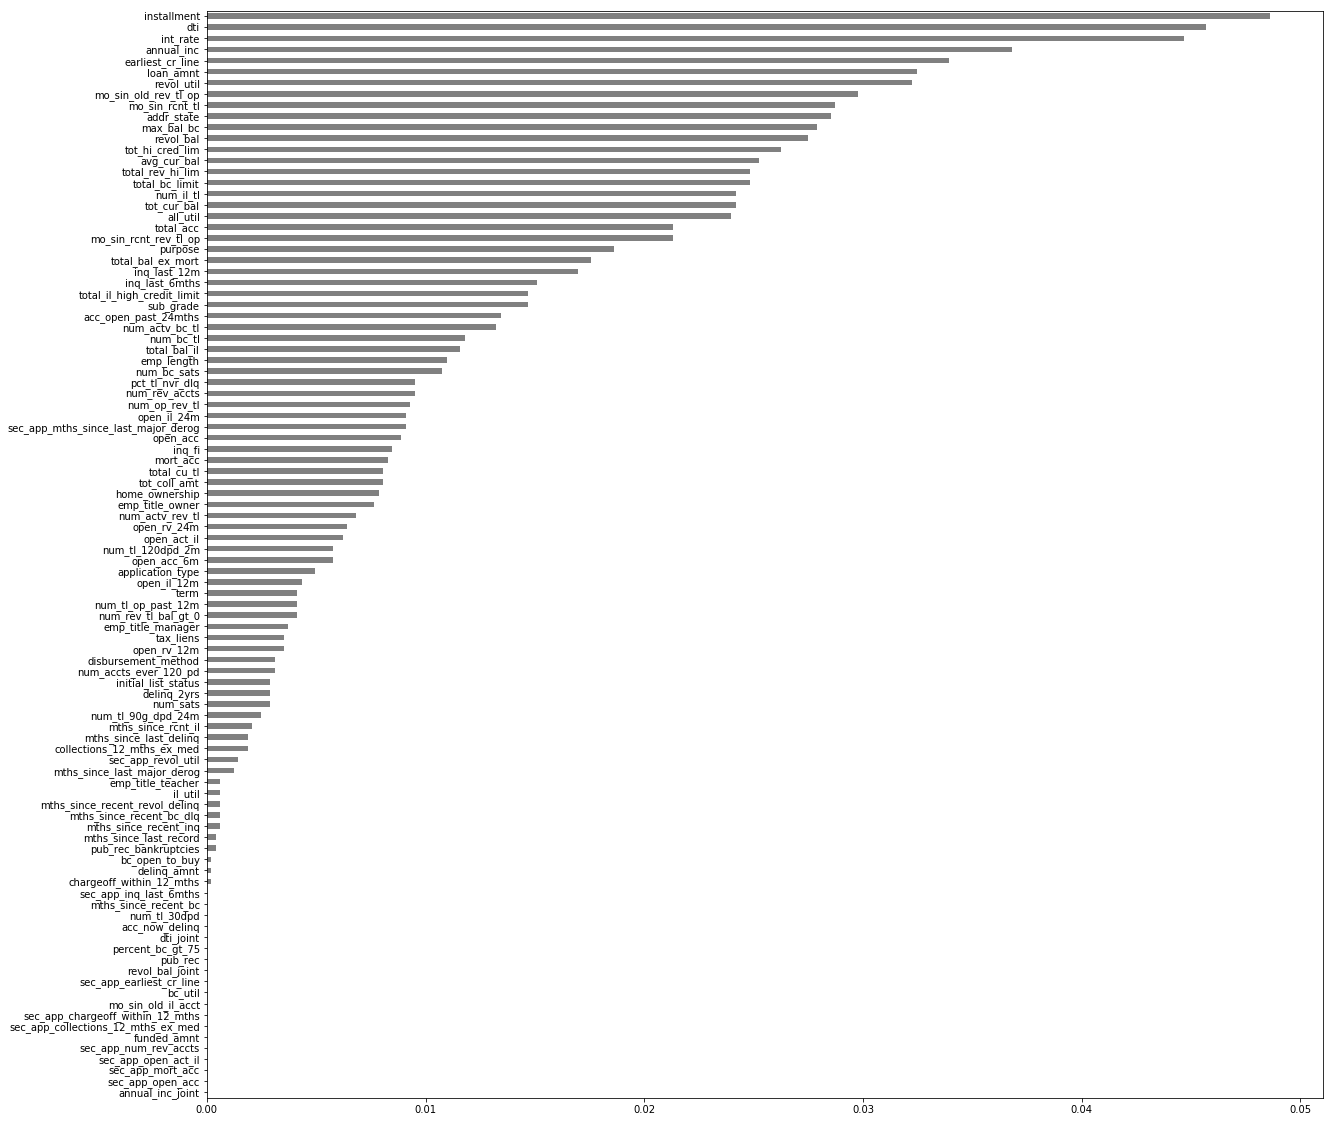

In [82]:
def show_feature_importances(pipe, X, y, estimator_name='xgbclassifier', n=98, figsize=(20, 20)):
    
    # pipe must not change dimensions of X dataframe
    pipe.fit(X, y)
    
    importances = pd.Series(
        pipe.named_steps[estimator_name].feature_importances_, 
        X.columns)

    top_n = importances.sort_values(ascending=False)[:n]
    
    plt.figure(figsize=figsize)
    top_n.sort_values().plot.barh(color='grey')

    
show_feature_importances(xgb_pipe2,X_train, y_train)

In [84]:
%%time
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)




encoder = ce.OrdinalEncoder()
X_train_encode = encoder.fit_transform(X_train)
X_val = encoder.transform(X_val)
xgb3 =  XGBClassifier(
        eta = 0.3, 
        min_child_weight = 1,
        max_depth = 6,
        gamma=0,
        max_delta_step = 0,
        subsample = 1,
        colsample_bytree = 1,
        colsample_bylevel = 1,
        #lambda = 1,
        alpha = 0,
        scale_pos_weight = 1, 
        n_jobs=-1)
xgb3.fit(X_train_encode, y_train)
y_pred_proba = xgb3.predict_proba(X_val)[:,1]
print('Validation ROC AUC:', roc_auc_score(y_val, y_pred_proba))

Validation ROC AUC: 0.7535737963358311
CPU times: user 23.1 s, sys: 28.1 ms, total: 23.1 s
Wall time: 3.11 s


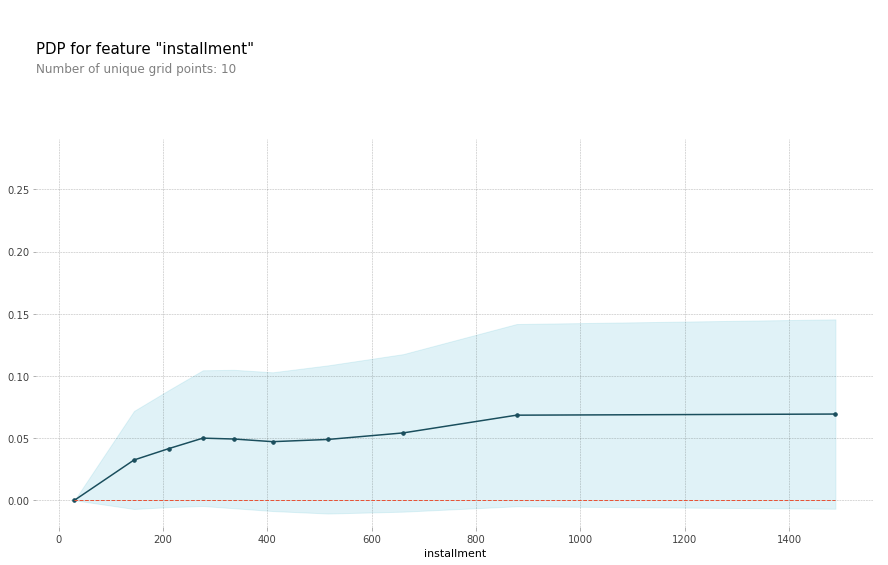

In [59]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature='installment'
pdp_isolated = pdp_isolate(model=xgb3, dataset=X_val, model_features=X_val.columns, feature=feature)
pdp_plot(pdp_isolated, feature);

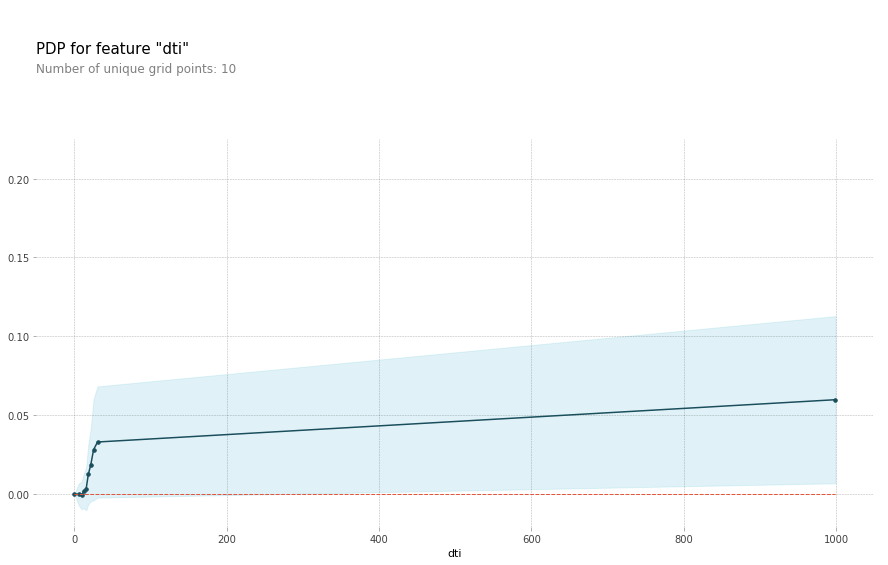

In [85]:
feature='dti'
pdp_isolated = pdp_isolate(model=xgb3, dataset=X_val, model_features=X_val.columns, feature=feature)
pdp_plot(pdp_isolated, feature);

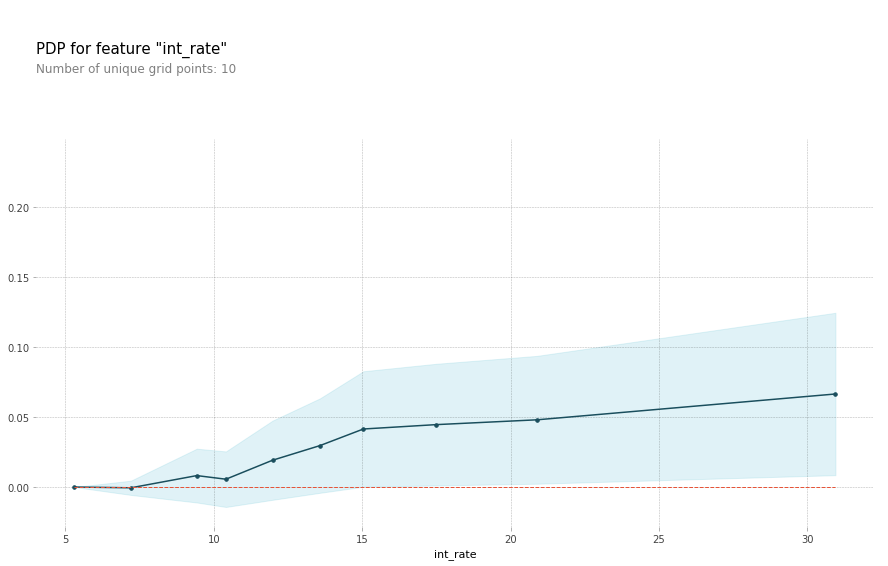

In [86]:
feature='int_rate'
pdp_isolated = pdp_isolate(model=xgb3, dataset=X_val, model_features=X_val.columns, feature=feature)
pdp_plot(pdp_isolated, feature);

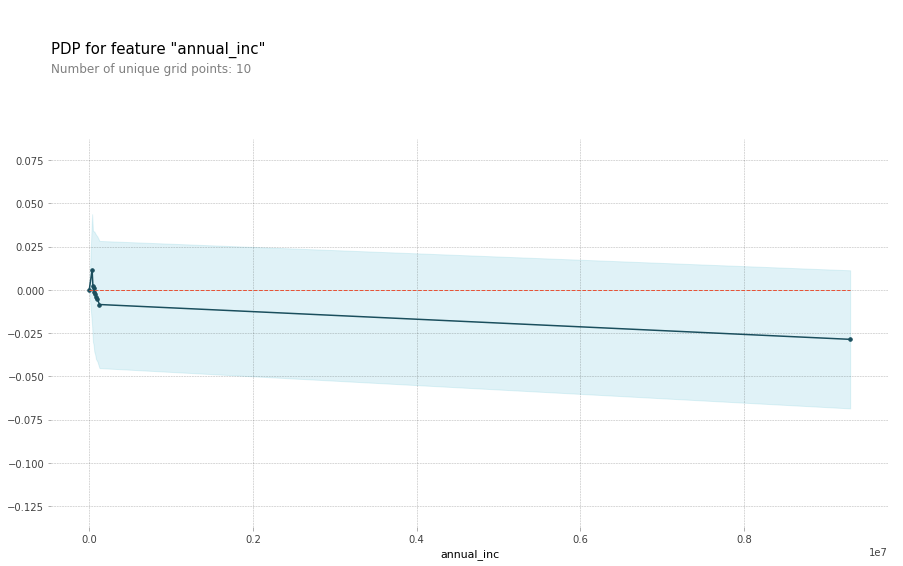

In [87]:
feature='annual_inc'
pdp_isolated = pdp_isolate(model=xgb3, dataset=X_val, model_features=X_val.columns, feature=feature)
pdp_plot(pdp_isolated, feature);

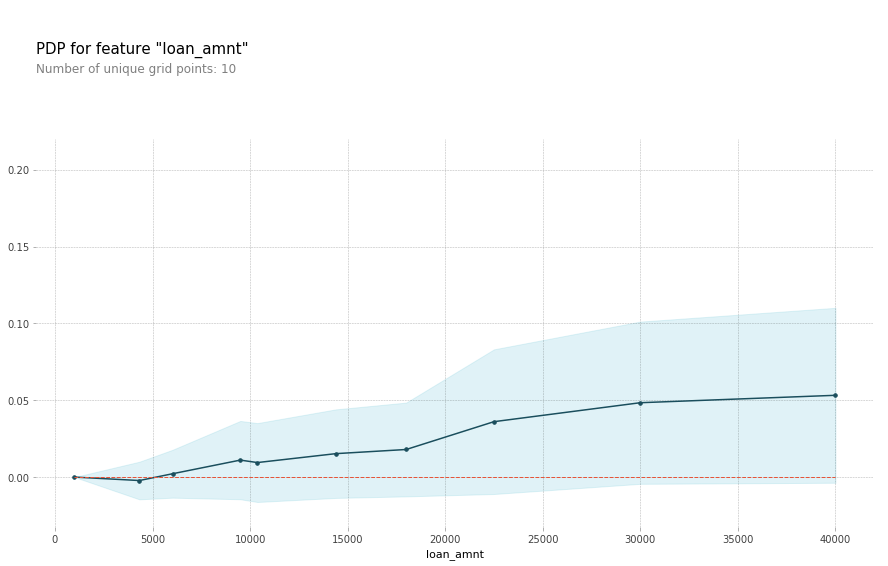

In [88]:
feature='loan_amnt'
pdp_isolated = pdp_isolate(model=xgb3, dataset=X_val, model_features=X_val.columns, feature=feature)
pdp_plot(pdp_isolated, feature);